# Ejercicio 4
Contenido del dataset: Conjunto de datos de vino rojo para determinar su calidad. Hay 12 atributos y el último atributo es la calidad, que se tomará como etiqueta. La calidad varía de 0 a 10, pero se va a convertir a un problema con dos clases, calidad pobre, de 0 a 5, y buena, de 6 a 10.
El ejercicio consiste obtener un modelo de clasificación para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Los atributos son: 1 fixed acidity, 2 volatile acidity, 3 citric acid, 4 residual sugar, 5 chlorides, 6 free sulfur dioxide, 7 total sulfur dioxide, 8 density, 9 pH, 10 sulphates, 11 alcohol, 12 quality (score between 0 and 10)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**Tomando como base el ejemplo 9 de los suministrados en clase**, implementar un clasificador basado en voting, que use los siguientes clasificadores: Random Forest, Regresión Logística y SVC. Ha de contener los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases estuviesen desbalanceadas.
*   Aplicar la técnica de voting.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Aplicar posteriormente los clasificadores cada uno por separado y obtener las mismas medidas para comparar con el clasificador basado en voting.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [ ]:
import pandas as pd

In [ ]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
unzip wilt.zip

--2024-01-01 23:35:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

     0K .......... .......... .......... .......... ..........  409K
    50K .......... .......... .......... ..                    34.4M=0.1s

2024-01-01 23:35:02 (668 KB/s) - ‘winequality-red.csv’ saved [84199]



In [ ]:
wine = pd.read_csv("/content/winequality-red.csv", sep=';')
#El segundo parámetro es para indicar que los separadotes son puntos y comas, ya que por defecto son comas.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Guardamos las etiquetas en y
y = wine["quality"]
#Definimos dos etiquetas, calidad > 5 (clase positiva), calidad <= 5 (clase negativa)
y = (y >5)
#Eliminamos las etiquetas del data set
X = wine.drop("quality", axis = 1)

In [ ]:
#Ahora se escalan los datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
#Vamos a ver las 3 primeras instancias del dataset
X[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [ ]:
y[:3]

0    False
1    False
2    False
Name: quality, dtype: bool

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba utilizando muestreo aleatorio estratificado con una proporción del 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20)

In [ ]:
# Crear una instancia de los clasificadores
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(random_state=42)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
#voting: {‘hard’, ‘soft’}, default=’hard’
       #Si es "hard", utiliza las etiquetas de clase predichas para la votación por regla de la mayoría.
        #Sino si es 'soft', predice la etiqueta de clase en función del argmax
        # de las sumas de las probabilidades pronosticadas, que se recomienda
        #para un conjunto de clasificadores bien calibrados.

In [ ]:
# Ajustar los datos al modelo de voting
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
# Obteniendo la predicción de x_test usando el modelo de voting
y_pred = voting_clf.predict(X_test)

In [ ]:
# Calculando las métricas para el modelo de votación
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
accuracy_voting = accuracy_score(y_test, y_pred)
precision_voting = precision_score(y_test, y_pred)
recall_voting = recall_score(y_test,y_pred)
f1_score_voting = f1_score(y_test, y_pred)

In [ ]:
# Repitiendo el proceso para clasificadores individuales: ajuste del modelo, predicciones usando el modelo construido, evaluación en x_test
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test,y_pred)
f1_score_log = f1_score(y_test, y_pred)

In [ ]:
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
accuracy_rnd = accuracy_score(y_test, y_pred)
precision_rnd = precision_score(y_test, y_pred)
recall_rnd = recall_score(y_test,y_pred)
f1_score_rnd = f1_score(y_test, y_pred)

In [ ]:
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test,y_pred)
f1_score_svm = f1_score(y_test, y_pred)


In [ ]:
accuracy_voting, accuracy_log, accuracy_rnd, accuracy_svm
acc = [accuracy_voting, accuracy_log, accuracy_rnd, accuracy_svm]
acc

[0.796875, 0.75, 0.825, 0.796875]

In [ ]:
prec = [precision_voting, precision_log, precision_rnd, precision_svm]
prec

[0.823170731707317, 0.7692307692307693, 0.8616352201257862, 0.823170731707317]

In [ ]:
rec = [recall_voting, recall_log, recall_rnd, recall_svm]
rec

[0.7894736842105263,
 0.7602339181286549,
 0.8011695906432749,
 0.7894736842105263]

In [ ]:
f1sc = [f1_score_voting, f1_score_log, f1_score_rnd, f1_score_svm]
f1sc

[0.8059701492537313,
 0.7647058823529411,
 0.8303030303030303,
 0.8059701492537313]

In [ ]:
clasifiador = ['Voting', 'LogisticReg', 'RandomForest', 'SVM']
Accuracy = []
Precision = []
Recall = []
F1_score = []

In [ ]:
Accuracy.append(acc)
Precision.append(prec)
Recall.append(rec)
F1_score.append(f1sc)



In [ ]:
# Creating a dictionary of data
data = {
    'clasifiador': clasifiador,
    'Accuracy': acc,
    'Precision': prec,
    'Recall':rec,
    'F1_score':f1sc
}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)

    clasifiador  Accuracy  Precision    Recall  F1_score
0        Voting  0.796875   0.823171  0.789474  0.805970
1   LogisticReg  0.750000   0.769231  0.760234  0.764706
2  RandomForest  0.825000   0.861635  0.801170  0.830303
3           SVM  0.796875   0.823171  0.789474  0.805970


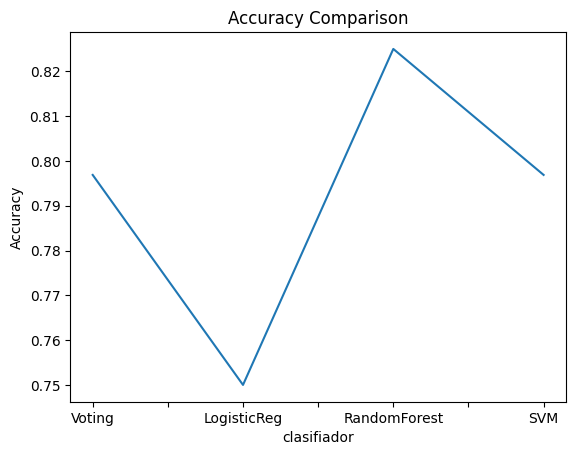

In [ ]:
import matplotlib.pyplot as plt
# Plotting the DataFrame as a bar plot

df.plot(x='clasifiador', y='Accuracy', kind='line', legend=None)
plt.xlabel('clasifiador')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.show()

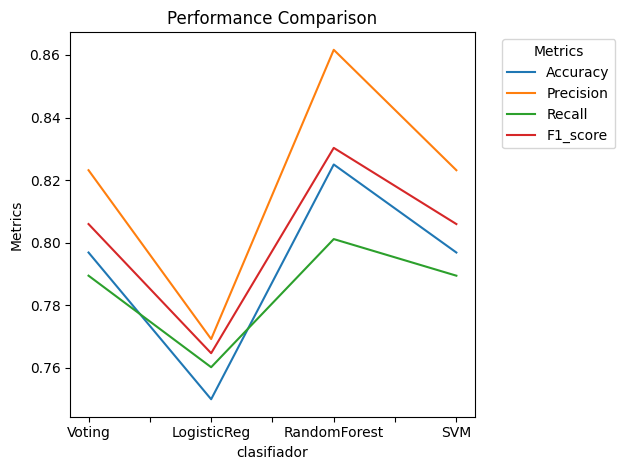

In [ ]:
import matplotlib.pyplot as plt
# Plotting the DataFrame as a bar plot

ax =df.plot(x='clasifiador', y=['Accuracy', 'Precision', 'Recall', 'F1_score'], kind='line', legend=None)
plt.xlabel('clasifiador')
plt.ylabel('Metrics')
plt.title('Performance Comparison')
# Display legends for each metric
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent legend overlapping


plt.show()

# **Summary**


> **Este cuaderno emplea clasificadores individuales y de conjunto para predecir la calidad del vino.**

Primero, cargamos el conjunto de datos "wine" y lo dividimos en el objetivo y los predictores utilizando el código proporcionado por el profesor. Segundo, escalamos las características utilizando StandardScaler de los métodos de preprocesamiento de sklearn. Luego, dividimos los datos en conjuntos de entrenamiento y prueba utilizando un muestreo estratificado aleatorio con una proporción del 20%. A continuación, iniciamos una instancia de esos algoritmos: Regresión Logística, Bosque Aleatorio, Máquinas de Soporte Vectorial y el voto utilizando estos. Luego obtenemos las predicciones utilizando el clasificador de votación y los clasificadores individuales. Finalmente, calculamos las métricas de rendimiento para los modelos construidos después de obtener las predicciones en el subconjunto x_test. **Graficamos las métricas para comparar la efectividad de los diferentes modelos en la predicción de la calidad del vino.** Observamos que el Bosque Aleatorio arrojó los valores más altos de accuracy (82%), precision (86%), recall (80%) y  F1-score (83%). Además, las SVM y el voto proporcionaron resultados similares, sin embargo, la regresión logística tiene puntuaciones promedio y más bajas en diferentes métricas en comparación con el resto de los modelos.












